<div style="text-align:right;color:navy">Machine Learning & Data Analysis &nbsp;  &nbsp;  &nbsp; Janurary 14, 2022</div>

# Lab 9:  Algorithms for Machine Learning

## 機器學習演算法

我們來討論一下常見的機器學習演算法，這些演算法背後的原理，需要花很多時間理解，我們只做簡單的介紹，並不做推導。上次我們討論了一下的演算法:

**監督學習 (Supervised algorithm)**  
* 分類演算法(Classification algorithm)  
  - 邏輯迴歸(Logistic regression)  
  - 線性判別分析(Linear discriminant analysis)  
  - K鄰近(K nearest neighbors)  
  
* 迴歸演算法(Regression algorithm)  
  - 線性迴歸(Linear regression)  
  - 嶺迴歸(Ridge regression)

  
今天主要的目的是學習如何使用這些演算法。 

**監督學習 (Supervised algorithm)**  
* 分類演算法(Classification algorithm)  
  - 樸素貝氏演算法(Naive Bayes)  
  - 支持向量機(Support vector machines)  
  - 決策樹(Decision tree) 
  
**非監督學習  (Unsupervised algorithm)**
* 分群演算法
  - K-means  
  - 高斯混合模型(Gaussian Mixture Models)  [Gaussian Mixture Models](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.mixture)  Later
  - 最大期望演算法(Maximize expectation)  Later

## 監督學習 (Supervised algorithm)


#### 樸素貝氏演算法(Naive Bayes) 
##### Bayes's theorem (貝氏定理)
貝氏定理是關於隨機事件A和B的條件概率的一則定理。

$${\displaystyle P(A\mid B)={\frac {P(B\mid A)P(A)}{P(B)}}}$$

其中 ${\displaystyle A}$ 以及 ${\displaystyle B}$ 為隨機事件，且 ${\displaystyle P(B)}$ 不為零。${\displaystyle P(A|B)}$ 是指在事件 ${\displaystyle B}$ 發生的情況下事件 ${\displaystyle A}$ 發生的機率。

在貝氏定理中，每個名詞都有約定俗成的名稱：

> ${\displaystyle P(A\,|\,B)}$ 是已知 ${\displaystyle B}$ 發生後，${\displaystyle A}$ 的條件機率。也由於得自 ${\displaystyle B}$ 的取值而被稱作 ${\displaystyle A}$ 的後驗機率(Posterior prabability)。 <br>
> ${\displaystyle P(A)})$ 是 ${\displaystyle A}$ 的先驗機率（Prior probability或邊緣機率）。之所以稱為"先驗"是因為它不考慮任何 ${\displaystyle B}$ 方面的因素。 <br>
> ${\displaystyle P(B\,|\,A)}$ 是已知 ${\displaystyle A}$ 發生後， ${\displaystyle B}$ 的條件機率。 <br>
> ${\displaystyle P(B)}$ 是 ${\displaystyle B}$ 的先驗機率。 <br>

按這些術語，貝氏定理可表述為： <br>
      後驗機率 = (似然性*先驗機率)/標准化常量 <br>
也就是說，後驗機率與先驗機率和相似度的乘積成正比。

另外，比例 ${\displaystyle P(B|A)/P(B)}$ 也有時被稱作標准似然度（standardised likelihood），貝氏定理可表述為：

後驗機率 = 標准似然度*先驗機率

[維基百科-貝氏定理](https://zh.wikipedia.org/wiki/%E8%B4%9D%E5%8F%B6%E6%96%AF%E5%AE%9A%E7%90%86)

##### 應用貝氏定理
當我們想用「特徵」(features)來判斷「類別」(labels)時，可以利用「貝氏定理」：

$$P(類別~|~{\rm 特徵}) = \frac{P({\rm 特徵}~|~類別)P(類別)}{P({\rm 特徵})}$$

經由計算 Prior probability，$P({\rm 特徵}~|~類別)、P(類別)、P(特徵)$，可以得到在某個「特徵」下，屬於某「類別」的機率。

當利用特徵直接計算類別的機率「$P(類別~|~{\rm 特徵})$」的演算法，我們稱為 Discriminative learning algorithm，而由計算 Prior probability，$P(特徵~|~類別)、P(類別)、P(特徵)$，可以得到在特徵下，屬於某類別的機率「$P(特徵~|~類別)$」，我們稱為 Generative learning algorithm。在 generative model 中，計算 $P(特徵~|~類別)$ 是很困難的，但經由假設，這個計算過程就簡單多了。

[Deep Understanding of Discriminative and Generative Models in Machine Learning](https://www.analyticsvidhya.com/blog/2021/07/deep-understanding-of-discriminative-and-generative-models-in-machine-learning/)


#### Gaussian Naive Bayes (樸素貝氏演算法)
[GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)  
假設特徵及類別都是常態分佈，適用於高維度計算。


### Exapmple
在 [Wine recognition dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset) 資料上，使用Gaussian Naive Bayes (樸素貝氏演算法)分類，請參考:[sklearn.datasets.load_wine](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine)。

#### Step 1
使用 Train test split 資料分為訓練集、驗證集，驗證集為十分之一，random_state=42


In [3]:
from sklearn.datasets import load_wine
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import train_test_split
wine = load_wine()

X = wine['data']
y = wine['target']
features = wine['feature_names']

# 使用 Train test split 資料分為訓練集、檢視集，檢視集為10分之一
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1, random_state=42)

#### Step 2
對估計量模型 Linear discriminant analysis 做交叉驗證(Cross-Validation)。使用 sklearn.model_selection.cross_validate 對 training set 做交叉驗證，設定 10-fold ， scoring Metrics 使用 accuracy_score、balance_accuracy_score 來評估，將結果列印出來

In [8]:
# Create linear regression object
clf = GaussianNB()

# Cross validate
scores = cross_validate(clf, X_train, y_train, cv=10,
                        scoring=('accuracy','balanced_accuracy'),
                        return_train_score=True)
scores
print('The accuracy is',scores['test_accuracy'].mean())
print('The balance accuracy is',scores['test_balanced_accuracy'].mean())

The accuracy is 0.96875
The balance accuracy is 0.9688888888888888


#### Step 3
在驗證集做預測，使用 accuracy_score、balance_accuracy_score 來評估，將結果列印出來。

In [ ]:
# Train the model using the training sets
clf.fit()

# Make predictions using the testing set
y_pred = clf.predict()

print('The accuracy for the test set is',accuracy_score())
print('The balance accuracy for the test set is',
      balanced_accuracy_score())

### Exercise 1
在 Iris Dataset 資料上，
1. 使用 Train test split 資料分為訓練集、驗證集，驗證集為十分之一，random_state=42
2. 對估計量模型 [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) 做交叉驗證(Cross-Validation)。使用 [sklearn.model_selection.cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) 對 training set 做交叉驗證，設定 10-fold ， scoring Metrics 使用 accuracy_score、balance_accuracy_score 來評估，將結果列印出來
3. 在驗證集做預測，使用 accuracy_score、balance_accuracy_score 來評估，將結果列印出來。

In [48]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import train_test_split
iris = load_iris()

X = iris['data']
y = iris['target']
features = iris['feature_names']

# 使用 Train test split 資料分為訓練集、檢視集，檢視集為10分之一
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1, random_state=42)


In [44]:

clf = GaussianNB()

# Cross validate
scores = cross_validate(clf, X_train, y_train, cv=10,
                        scoring=('accuracy','balanced_accuracy'),
                        return_train_score=True)
scores
print('The accuracy is',scores['test_accuracy'].mean())
print('The balance accuracy is',scores['test_balanced_accuracy'].mean())

(135,)

In [51]:
clf.fit(X_train,y_train)

# Make predictions using the testing set
y_pred = clf.predict(X_test)

print('The accuracy for the test set is',accuracy_score(y_test,y_pred))
print('The balance accuracy for the test set is',
      balanced_accuracy_score(y_test,y_pred))

The accuracy for the test set is 1.0
The balance accuracy for the test set is 1.0


#### 支持向量機(Support vector machines)

支持向量機（SVM）原始的概念，最早是由俄羅斯籍數學家佛拉基米爾‧萬普尼克（Vladimir Naumovich Vapnik）等人於1963年所提出。支持向量機屬於監督學習，可以用來處理分類問題(Classification problems)。

如何將一羣屬於不同類別的資料分類？一個非常直覺的做法是用直線、曲線、平面、或曲面把它們分隔開來。

但是如何分隔？用直線(平面)、還是曲線(曲面)？

怎樣找出最恰當的分隔？那一個直線(平面、曲線、曲面)最好？

###### 先載入需要的模組。 
[matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

使用[sklearn.datasets.make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs)建立兩組資料。  
[Choosing Colormaps in Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

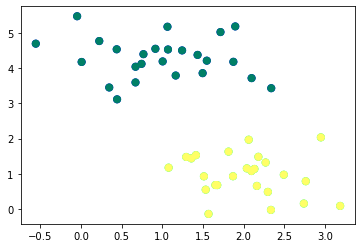

In [11]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')

對以上的資料，可以用直線將它們分開。使用 <br>
$\quad y=x+0.65$ <br>
及 <br>
$\quad y=-0.2x+2.9$ <br>
都可以。執行下列程式，觀察後，你覺得那一條較好？  
[numpy.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)  
[matplotlib.pyplot.text](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html#matplotlib.pyplot.text)

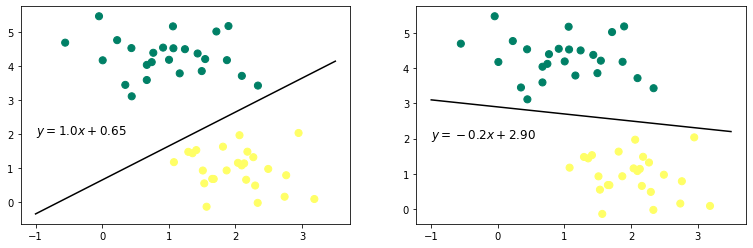

In [12]:
xfit = np.linspace(-1, 3.5)
fig, axes = plt.subplots(1,2,figsize=(13,4))

for (i,(m,b)) in enumerate([(1, 0.65),(-0.2, 2.9)]):
    axes[i].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
    axes[i].text(-1, 2, '$y=%3.1f x+%3.2f$' %(m,b), fontsize=12)
    axes[i].plot(xfit, m * xfit + b, '-k')

若加入一個新的資料，$(0.6,2.1)$紅色叉叉，你覺得它應該屬於那一類？ <br>
執行下列程式，$(0.6,2.1)$用紅色叉叉表示，觀察後，你覺得它應該屬於那一類？

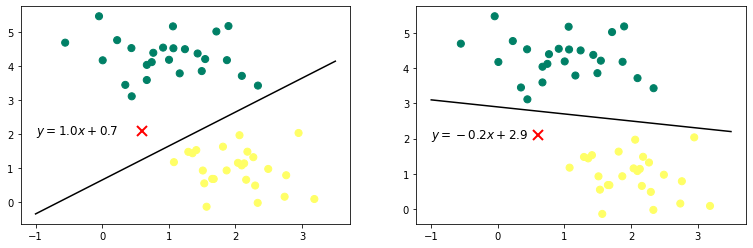

In [13]:
xfit = np.linspace(-1, 3.5)
fig, axes = plt.subplots(1,2,figsize=(13,4))

for (i,(m,b)) in enumerate([(1, 0.65),(-0.2, 2.9)]):
    axes[i].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
    axes[i].text(-1, 2, '$y=%3.1f x+%3.1f$' %(m,b), fontsize=12)
    axes[i].plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)
    axes[i].plot(xfit, m * xfit + b, '-k')

- 對於$\, y=x+0.65$，我們判定它屬於「綠色」那一類， <br>
- 但是對於$\, y=-0.2x+2.9$，我們判定它屬於「黃色」那一類

有很多選擇

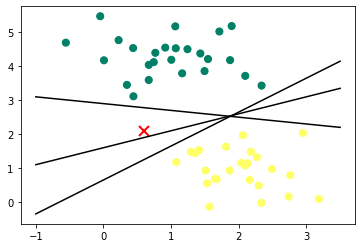

In [14]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

執行下列程式，觀察圖中A、B、C三點。你覺得使用$\, y=x+0.7$ 當分界線來判斷A、B、C三點的屬性，那一個比較有把握？

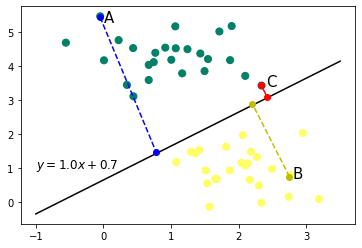

In [15]:
xfit = np.linspace(-1, 3.5)
(m,b)=(1, 0.65)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
plt.text(-1, 1, '$y=%3.1f x+%3.1f$' %(m,b), fontsize=12)
plt.plot(xfit, m * xfit + b, '-k')
plt.text(0, 5.3, 'A', fontsize=15)
plt.text(2.8, 0.7, 'B', fontsize=15)
plt.text(2.4, 3.4, 'C', fontsize=15)
plt.plot([-0.05,0.78],[5.45,1.47],'bo--',[2.75,2.2],[0.75,2.9],'yo--',[2.33,2.42],[3.45,3.1],'ro-')

A 最有把握，B 次之，C 似乎沒什麼把握。為什麼有這樣的結論？

依據 A、B、C 三點到分界線 $\, y=x+0.7$  的距離來判斷。

根據這個想法，一個理想的分界線，是使得「分界線到這些 training data 的最小距離」最大的那一個！

執行下列程式，你覺得那一個分界線最理想？

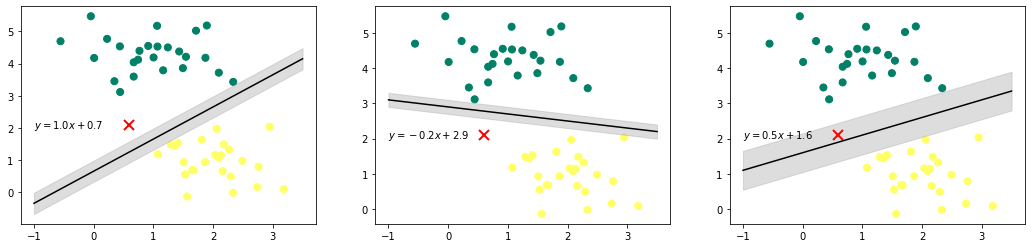

In [16]:
xfit = np.linspace(-1, 3.5)
fig, axes = plt.subplots(1,3,figsize=(18,4))

for (i,(m,b,d)) in enumerate([(1, 0.65, 0.33),(-0.2, 2.9, 0.2),(0.5, 1.6, 0.55)]):
    axes[i].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
    axes[i].plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)
    yfit = m * xfit + b
    axes[i].plot(xfit, yfit, '-k')
    axes[i].fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                         color='#AAAAAA', alpha=0.4)
    axes[i].text(-1, 2, '$y=%3.1f x+%3.1f$' %(m,b), fontsize=10)

當然是 $\, y=0.5x+1.6$ 最好，因為它有最寬的間隔(margin)。

### 使用支持向量機（SVM）
支持向量機（SVM）就是一個可以讓我們找出最大間隔(margin)的 estimator，其使用語法請參考[sklearn.svm: Support Vector Machines](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm)，我們使用其中的[sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)。

使用支持向量機的時候，演算法中某些參數的意義:

**C** : float, optional (default=1.0) <br>
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.  
[Scaling the regularization parameter for SVCs](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_scale_c.html)  
[Machine Learning 101](https://medium.com/machine-learning-101)


"For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points."  
來自於下列文章: [SVM (Support Vector Machine) — Theory](https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72)  

**kernel** : string, optional (default=’rbf’) <br>
Specifies the kernel type to be used in the algorithm. It must be one of **‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable**. If none is given, ‘rbf’ will be used.

核函数 可以是以下任何形式： [Kernel functions](https://scikit-learn.org/stable/modules/svm.html#svm-kernels)  
$\qquad$ - 線性: $\langle x, x'\rangle$. <br>
$\qquad$ - 多項式: $(\gamma \langle x, x'\rangle + r)^d$. d 是關鍵詞 degree, r 指定 coef0。 <br>
$\qquad$ - rbf: $e^{(-\gamma \|x-x'\|^2)}$. $\gamma$ 是關鍵詞 gamma, 必須大於 0。 <br>
$\qquad$ - sigmoid $(\tanh(\gamma \langle x,x'\rangle + r))$, 其中 r 指定 coef0。 <br>

給定訓練向量 $x_i \in \mathbb{R}^p$, $i=1,…, n$, 和一個向量$ y \in \{1, -1\}^n$, SVC能解決 如下主要問題:

$$\min_{w, b, \zeta}\frac{1}{2} w^T w + C\sum_{i=1}^{n} \zeta_i \\
y_i (w^T \phi (x_i) + b) \geq 1 - \zeta_i, \\
 \zeta_i \geq 0, i=1, ..., n$$

它的對偶是

$$\min_{\alpha} \frac{1}{2} \alpha^T Q \alpha - e^T \alpha \\
y^T \alpha = 0\\
 0 \leq \alpha_i \leq C, i=1, ..., n$$

其中 $e$ 是所有的向量， $C > 0$ 是上界，$Q$ 是一個 n 由 n 個半正定矩陣， 而 $Q_{ij} \equiv y_i y_j K(x_i, x_j)$ ，其中 $K(x_i, x_j) = \phi (x_i)^T \phi (x_j)$ 是內核。所以訓練向量是通過函數 $\phi$，間接反映到一個更高維度的（無窮的）空間。


#### 套用模型
使用 linear 線性的核函数([Kernel functions](https://scikit-learn.org/stable/modules/svm.html#svm-kernels))，

In [17]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)

#### 訓練 model

In [18]:
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

SVM 決策函數取決於訓練集的一些子集, 稱作支持向量. 這些支援向量的部分特性可以在屬性 support_vectors_, support_ 和 n_support_ 找到:

- support_vectors_: 支援向量(support vectors) <br>
- support_ : 支援向量的 indeice <br>
- n_support_ : 每一個類別中的支援向量
- coef_ : 
- intercept_:

另外SVM 決策函數(Decision function)可在方法 [decision_function(self, X)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.decision_function)找到。

請試著了解其意義

In [ ]:
model.support_vectors_

In [ ]:
model.support_

In [ ]:
model.n_support_

In [ ]:
model.coef_

In [ ]:
model.intercept_

In [ ]:
model.decision_function(X)

In [ ]:
model.predict(X)

### Example
繪出最理想分界線。 


Text(-0.3, 2, '$y=0.2 x+2.3$')

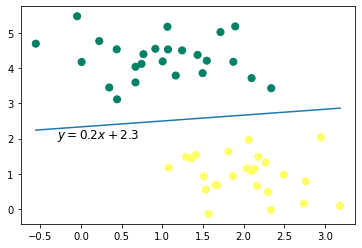

In [19]:
X_new = np.linspace(X[:,0].min(), X[:,0].max(), 30)
m = -(model.coef_[0,0]/model.coef_[0,1])
b = -(model.intercept_[0]/model.coef_[0,1])
y_new = m*X_new+b
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
plt.plot(X_new,y_new)
plt.text(-0.3, 2, '$y=%3.1f x+%3.1f$' %(m,b), fontsize=12)
#plt.savefig('Support_Vector_Machines_Exercise_2')



### Example
繪出最理想分界線並對新的資料做預測。 



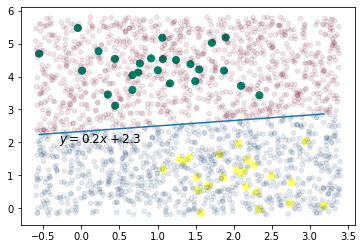

In [20]:
# 使用這個 Testing data
rng = np.random.RandomState(0)
X_new1 = [-0.6, -0.2] + [4, 6] * rng.rand(2000, 2)

# Predict
y_new1 = model.predict(X_new1)

# Plot the original data and the 分界線
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
plt.plot(X_new,y_new)
plt.text(-0.3, 2, '$y=%3.1f x+%3.1f$' %(m,b), fontsize=12)

# Plot the Testing data and the prediction
#lim = plt.axis()
plt.scatter(X_new1[:, 0], X_new1[:, 1], c=y_new1, s=20, cmap='RdBu', alpha=0.1)
#plt.axis(lim)
#plt.savefig('Support_Vector_Machines_Exercise_3')


下列函數可以讓你更精確的了解支援向量、決策邊界(Decision boundary)的意義

[matplotlib.pyplot.contour](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.contour.html)

參考: [Python Data Science Handbook By Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)

[Content](https://www.oreilly.com/library/view/python-data-science/9781491912126/)

https://jakevdp.github.io/PythonDataScienceHandbook/

In [21]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none',edgecolors ='r');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

使用 plot_svc_decision_function 將決策邊界(Decision boundary)及三個支援向量(Support vectors)標示出來。

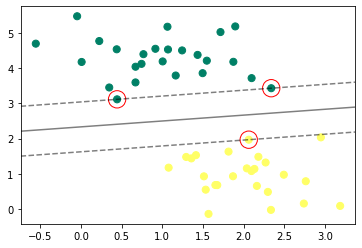

In [22]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
plot_svc_decision_function(model)

支持向量機（SVM）找出最大間隔(margin)重要的是支持向量的位置，和樣本數沒有直接關係。由下面的程式可以看出這個現象。當 N=60、N=120 其實支持向量是一樣的。

你可以改變 for axi, N in zip(ax, [60, 120]): 中 N 的數量觀察一下。

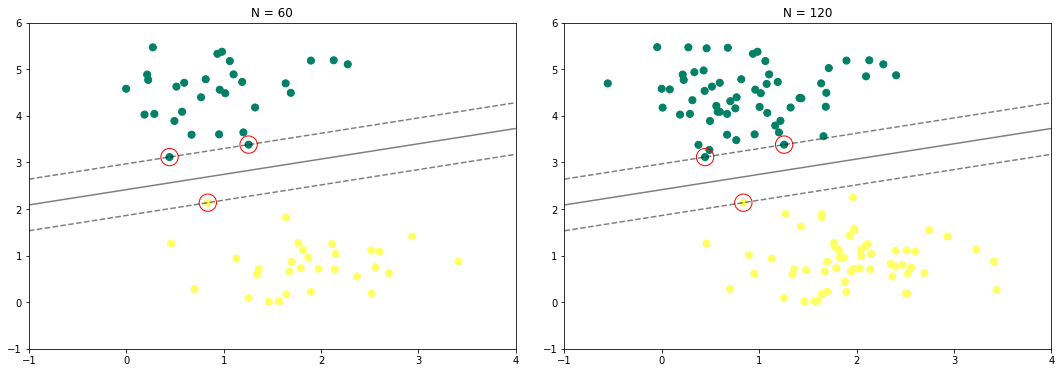

In [23]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

### Exercise 2
在 Iris Dataset 資料上，
1. 使用 Train test split 資料分為訓練集、驗證集，驗證集為十分之一，random_state=42
2. 對估計量模型 [sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) 做交叉驗證(Cross-Validation)。使用 [sklearn.model_selection.cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) 對 training set 做交叉驗證，設定 10-fold ， scoring Metrics 使用 accuracy_score、balance_accuracy_score 來評估，將結果列印出來
3. 在驗證集做預測，使用 accuracy_score、balance_accuracy_score 來評估，將結果列印出來。

In [55]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import accuracy_score, balanced_accuracy_score

iris = datasets.load_iris()
X = iris['data']
y = iris['target']
# 使用 Train test split 資料分為訓練集、檢視集，檢視集為10分之一
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.1, random_state=42)

# Create linear regression object
svc = SVC(decision_function_shape='ovo')

# Cross validate
scores = cross_validate(svc, X_train, y_train, cv=10, scoring =('accuracy','balanced_accuracy'))

print('The accuracy is',scores['test_accuracy'].mean())
print('The balance accuracy is',scores['test_balanced_accuracy'].mean())

svc.fit(X_train, y_train)
svc.predict(X_test)
y_pred = clf.predict(X_test)

print('The accuracy for the test set is',accuracy_score(y_test,y_pred))
print('The balance accuracy for the test set is',
      balanced_accuracy_score(y_test,y_pred))



The accuracy is 0.9697802197802197
The balance accuracy is 0.9683333333333334
The accuracy for the test set is 1.0
The balance accuracy for the test set is 1.0


## 非監督學習  (Unsupervised algorithm)

* 分群演算法
  - K-means  
  - 高斯混合模型（GMM）  Later    
  - 最大期望演算法(Maximize expectation)   Later  
  
#### K-means
[ML入門（十八）K-Means](https://medium.com/chung-yi/ml%E5%85%A5%E9%96%80-%E5%8D%81%E5%85%AB-k-means-f92b9f1e8871)  
[K-means 分群](https://ithelp.ithome.com.tw/articles/10209058)  

假如手上擁有沒有label的資料，我們想將它分類，可以將相似的數據歸類為一起，每一筆數據屬於一組，每一組稱作為群集 (Cluster)。那根據什麼來分類，我們常用距離來做運算。下面來介紹一個分群的方法，稱為 K-means。

K-means 分群 (K-means Clustering)，其實就有點像是以前學數學時，找重心的概念。
概念是這樣的：

1. 我們先決定要分幾組，如k組，然後隨機選k個點做群集中心。
2. 將每一個點分類到離自己最近的群集中心(可用直線距離)。
3. 重新計算各組的群集中心(常用平均值)。
4. 反覆 2、3 動作，直到群集不變，群集中心不動為止。

說明如下

1. 決定把資料分成 k 群，例如 k=2  
2. 在二維平面上隨機選取 k(k=2)個點，稱爲 cluster centroid，以這 k(k=2)個點，將資料分成 k(k=2)群
![KM1](K-Mean_01.png)
3. 對每個資料計算與這 k(k=2)個cluster centroid的距離，取 k(k=2)個距離中最近的，將資料歸為該cluster centroid那一群(cluster assignment)
![KM2](K-Mean_02.png)
4. 接著用步驟3當中，每一群的資料，重新計算cluster centroid的位置（因為每次都會有被分類過來的資料）
![KM3](K-Mean_03.png)
5. 一直重複3、4，直到所有群cluster centroid沒有太大的變動才結束。

[sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

請試著了解演算法當中的各個參數的定義，我們先用一個例子來說明 KMeans 演算法，首先製造一組數據，這組數據的四個核心

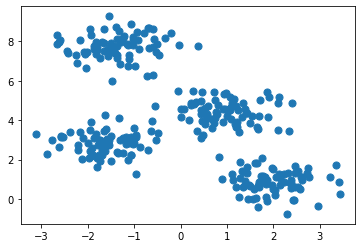

In [24]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

利用 KMeans 演算法，將資料分成 4 組

In [25]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

用預測所得的結果繪圖

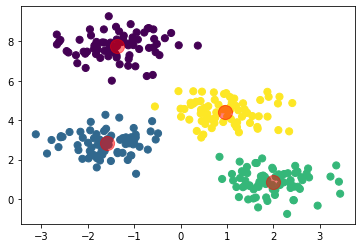

In [26]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

下載 iris 資料，使用特徵 'petal length (cm)','petal width (cm)'，畫出這些資料的散佈圖

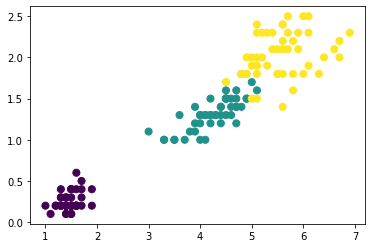

In [27]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import accuracy_score, balanced_accuracy_score
import matplotlib.pyplot as plt

# Load the diabetes dataset
iris= datasets.load_iris()
X_iris = iris['data']
y = iris['target']

feature_choosen = [2,3]
X = X_iris[:, feature_choosen]

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.show()

In [28]:
features = iris['feature_names']
features 

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

使用 KMeans 演算法，將資料分成三群，然後將預測結果繪圖

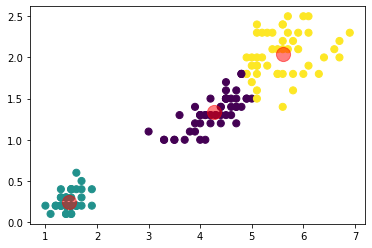

In [29]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
#kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
#plt.scatter(X[:, 0], X[:, 1], c=(y_kmeans+2)%3, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

預測的結果， 似乎和原始的資料不太一樣， 將他們列印出來

In [30]:
print(y)
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 2]


一個轉換 array 內容的程式

In [31]:
def np_switch(data, original=[0,1,2], new=[0,1,2]):
    data1 = data.copy()
    for i in range(len(original)):
        data1[data1 == original[i]]=new[i]+100
    return data1-100

注意：因為並沒有設 random_state 的值，y_kmeans 會隨機改變，所以 original 參數要跟著改變

In [32]:
a=np_switch(y_kmeans, original=[1,0,2], new=[0,1,2])
print(a)
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2
 2 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 2]


經過轉換後，重新畫圖

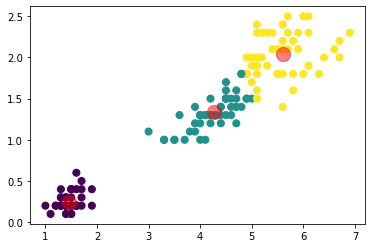

In [33]:
y_pred = np_switch(y_kmeans, original=[1,0,2], new=[0,1,2])

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
#plt.scatter(X[:, 0], X[:, 1], c=(y_kmeans+2)%3, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

### Exercise 3  
random_state=41
1. 在 Iris Dataset 資料上，使用特徵 'sepal length (cm)','sepal width (cm)'，畫出這些資料的散佈圖
2. 使用 KMeans 演算法，將資料分成三群，然後將預測結果繪圖
3. 使用 accuracy_score、balance_accuracy_score 來評估，將結果列印出來。
4. 應該會得到這樣的結果
![KM4](K-Mean_04.png)

The accuracy is 0.82  
The balance accuracy is 0.82

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]
the accuracy is 0.82
the balanced accuracy is 0.82


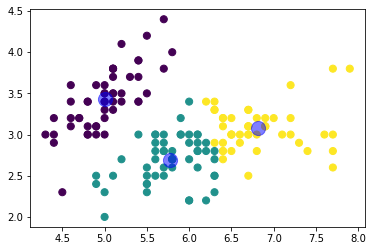

In [27]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import accuracy_score, balanced_accuracy_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

iris = datasets.load_iris()

X = iris['data'][:,:2]
y = iris.target


kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(y_kmeans)
def np_switch(data, original=[0,1,2], new=[0,1,2]):
    data1 = data.copy()
    for i in range(len(original)):
        data1[data1 == original[i]]=new[i]+100
    return data1-100

a=np_switch(y_kmeans, original=[2,0,1], new=[0,1,2])

plt.scatter(X[:,0], X[:,1], c=a, s=50, cmap="viridis")
 
center = kmeans.cluster_centers_

plt.scatter(center[:, 0], center[:, 1], c='blue', s=200, alpha=0.5)

print('the accuracy is', accuracy_score(y,a))
print('the balanced accuracy is', balanced_accuracy_score(y,a))

### Exercise 4
1. 在 Iris Dataset 資料上，使用所有特徵做分群。
2. 使用 KMeans 演算法，將資料分成三群，random_state 設為 42。
3. 做預測，使用 accuracy_score、balance_accuracy_score 來評估，將結果列印出來。
4. 應該會得到這樣的結果

The accuracy is 0.8933333333333333  
The balance accuracy is 0.8933333333333332

In [ ]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import accuracy_score, balanced_accuracy_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans







